In [1]:
import pandas as pd
from pymongo import MongoClient
client = MongoClient("localhost:27017")

In [2]:
client.list_database_names()
# Lists all the databases in my Mongo. 

['Ironhack', 'admin', 'config', 'local']

In [3]:
db = client["Ironhack"]
# Looks for the database called "Ironhack".

In [4]:
db.list_collection_names()
# Lists all the collections inside the "Ironhack" database. 

['nyrest', 'myneigh', 'Companies']

In [5]:
collection = db.get_collection("Companies")
# Accesses the collection called "Companies".

In [6]:
total_count = collection.count_documents({})
total_count
# Counts the number of rows in the collection.

18801

In [7]:
unique_values = collection.distinct('category_code')

for i in unique_values:
    print(i)
# Prints the unique values of 'category_code'.

None
advertising
analytics
automotive
biotech
cleantech
consulting
design
ecommerce
education
enterprise
fashion
finance
games_video
government
hardware
health
hospitality
legal
local
manufacturing
medical
messaging
mobile
music
nanotech
network_hosting
news
nonprofit
other
photo_video
public_relations
real_estate
search
security
semiconductor
social
software
sports
transportation
travel
web


In [8]:
values_to_match = ['analytics', 'biotech', 'cleantech', 'games_video', 'hardware', 'nanotech', 'network_hosting', 'software', 'web']
condition_1 = {'category_code':{'$in': values_to_match}}
# Defines condition_1 with companies related to the tech world.

In [9]:
document_count = collection.count_documents(condition_1)
document_count
# Counts all the rows after filtering with condition_1.

9349

In [10]:
unique_values_1 = collection.distinct('total_money_raised')

for i in unique_values_1:
    print(i)
# Prints all the unique values for column "total_money_raised".

$0
$1.01M
$1.02M
$1.03M
$1.04M
$1.05M
$1.06B
$1.08M
$1.09M
$1.11M
$1.13M
$1.14M
$1.15B
$1.15M
$1.16B
$1.17M
$1.19M
$1.1B
$1.1M
$1.21M
$1.23M
$1.25M
$1.27M
$1.2B
$1.2M
$1.31M
$1.32M
$1.33M
$1.35M
$1.36M
$1.3M
$1.42M
$1.44M
$1.45M
$1.46M
$1.4M
$1.51M
$1.53M
$1.55M
$1.56M
$1.57M
$1.58M
$1.5M
$1.61M
$1.62M
$1.63M
$1.65M
$1.66M
$1.67M
$1.68M
$1.69M
$1.6M
$1.71M
$1.72M
$1.73M
$1.75M
$1.77B
$1.77M
$1.7M
$1.81M
$1.82M
$1.83M
$1.84M
$1.8M
$1.92M
$1.94M
$1.95M
$1.96M
$1.97M
$1.98M
$1.99M
$1.9M
$10.1M
$10.2M
$10.3M
$10.4M
$10.5M
$10.6M
$10.7M
$10.8M
$10.9M
$100M
$100k
$101M
$101k
$102M
$103M
$104M
$105M
$105k
$106M
$107M
$108M
$109M
$10M
$10k
$11.1M
$11.2M
$11.3M
$11.4M
$11.5M
$11.6M
$11.7M
$11.8M
$11.9M
$110M
$110k
$111M
$112M
$113M
$114M
$115M
$115k
$116M
$117M
$118M
$119M
$11M
$12.1M
$12.2M
$12.3M
$12.4M
$12.5M
$12.5k
$12.6M
$12.7M
$12.8M
$12.9M
$120M
$120k
$121M
$122M
$123M
$124M
$125M
$125k
$126M
$127M
$128M
$129M
$12M
$13.1M
$13.2M
$13.3M
$13.4M
$13.5M
$13.6M
$13.7M
$13.8M
$13.9M
$130M
$130

In [11]:
condition_2 = {"total_money_raised":{"$regex": "M$|B$", "$options": "i"}}
# Defines condition_2 based on "total_money_raised" higher than 1M.

In [12]:
len(list(collection.find({"total_money_raised":{"$regex": "M$|B$"}})))
# Counts all the rows after filtering the total amount raised higher than 1M.

4042

In [13]:
projection = {"_id": 0}
final_filter = list(collection.find({"$and":[condition_1, condition_2]}, projection))
# Defines a final_filter cobining condition_1 and condition_2.

In [14]:
len(final_filter)
# Prints the length of the final_filter.

2292

In [15]:
df_1 = pd.DataFrame(final_filter)
df_1
# Prints the dataframe after the last filter. 

,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,founded_year,...,offices,milestones,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo
0,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,2005.0,...,"[{'description': '', 'address1': '710 - 2nd Av...","[{'id': 5869, 'description': 'Wetpaint named i...",[],"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN
1,Geni,geni,http://www.crunchbase.com/company/geni,http://www.geni.com,http://blog.geni.com,http://blog.geni.com/index.rdf,geni,web,18.0,2006.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 15460, 'description': 'Announced hire ...","[{'embed_code': '<object width=""425"" height=""3...",[],[],[],NaN,NaN,NaN,NaN
2,StumbleUpon,stumbleupon,http://www.crunchbase.com/company/stumbleupon,http://www.stumbleupon.com,http://www.stumbleupon.com/blog,,stumbleupon,web,NaN,2002.0,...,"[{'description': '', 'address1': '', 'address2...","[{'id': 3103, 'description': 'Spin-out from Eb...","[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[150, 72], 'assets/imag...",[{'external_url': 'http://www.facebook.com/Stu...,[],NaN,NaN,NaN,NaN
3,Gizmoz,gizmoz,http://www.crunchbase.com/company/gizmoz,http://gizmoz.com,,,None,web,NaN,2003.0,...,"[{'description': None, 'address1': None, 'addr...",[],[],[],[],[],NaN,NaN,NaN,NaN
4,Lala,lala,http://www.crunchbase.com/company/lala,http://www.lala.com,http://www.lala.com/#blog,http://www.lala.com/#blog,None,games_video,NaN,NaN,...,"[{'description': 'Lala Headquarters', 'address...","[{'id': 5065, 'description': 'Apple acquires L...",[],"[{'available_sizes': [[[150, 103], 'assets/ima...",[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,Chestnut Medical,chestnut-medical,http://www.crunchbase.com/company/chestnut-med...,http://www.chestnutmedical.com,,,,biotech,NaN,NaN,...,"[{'description': '', 'address1': '173 Jefferso...",[],[],"[{'available_sizes': [[[150, 98], 'assets/imag...",[],[],NaN,NaN,None,None
2288,iGuiders,iguiders,http://www.crunchbase.com/company/iguiders,http://www.iguiders.com,,,iGuiders,web,5.0,2008.0,...,"[{'description': '', 'address1': '23811 Chagri...",[],"[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[150, 90], 'assets/imag...",[],[],NaN,NaN,None,None
2289,SolarPower Israel,solarpower-israel,http://www.crunchbase.com/company/solarpower-i...,http://www.solarpower.co.il,,,,cleantech,NaN,NaN,...,"[{'description': '', 'address1': 'Yevulim Comp...",[],[],"[{'available_sizes': [[[150, 102], 'assets/ima...",[],[],NaN,NaN,None,None
2290,Purfresh,purfresh,http://www.crunchbase.com/company/purfresh,http://www.purfresh.com,http://info.purfresh.com/PurTalk,,Purfresh_Inc,cleantech,NaN,1996.0,...,"[{'description': 'HQ', 'address1': '1350 Willo...",[],[],"[{'available_sizes': [[[150, 91], 'assets/imag...",[],[],NaN,NaN,None,None


In [16]:
country_counts = {}
for doc in final_filter:
    if "offices" in doc and len(doc["offices"]) > 0 and "country_code" in doc["offices"][0]:
        country_code = doc["offices"][0]["country_code"]
        if country_code in country_counts:
            country_counts[country_code] += 1
        else:
            country_counts[country_code] = 1
df_country_counts = pd.DataFrame(list(country_counts.items()), columns=["Country Code", "Count"])
df_country_counts = df_country_counts.sort_values(by="Count", ascending=False)
df_country_counts
# Counts the appearance of each country in the whole dataset.

,Country Code,Count
0,USA,1688
1,GBR,102
8,CAN,58
3,ISR,55
6,FRA,51
16,CHN,37
4,DEU,33
11,IND,22
7,CHE,14
22,SWE,14


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

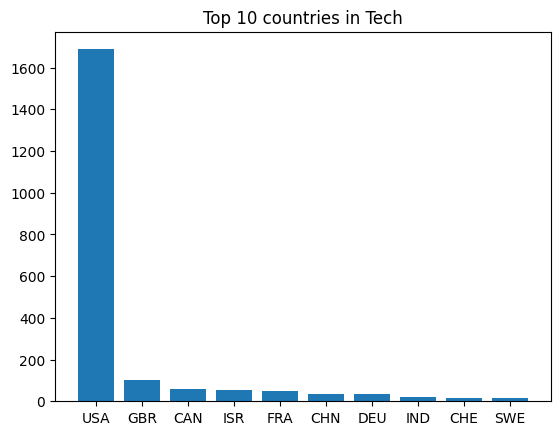

In [18]:
top_10_countries = df_country_counts.head(10)

plt.bar(top_10_countries["Country Code"], top_10_countries["Count"])
plt.title("Top 10 countries in Tech")
plt.show()
# Shows the top 10 countries (with more appearance in the dataset) in a bar plot. 

In [19]:
df_1['City'] = df_1['offices'].apply(lambda x: x[0]['city'] if (x and len(x) > 0 and 'city' in x[0]) else None)
df_1['Country Code'] = df_1['offices'].apply(lambda x: x[0]['country_code'] if (x and len(x) > 0 and 'country_code' in x[0]) else None)
df_1
# Adds new columns named "City" and "Country Code" at the end of the dataframe with the information related to each company. 

,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,founded_year,...,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo,City,Country Code
0,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,2005.0,...,[],"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN,Seattle,USA
1,Geni,geni,http://www.crunchbase.com/company/geni,http://www.geni.com,http://blog.geni.com,http://blog.geni.com/index.rdf,geni,web,18.0,2006.0,...,"[{'embed_code': '<object width=""425"" height=""3...",[],[],[],NaN,NaN,None,None,West Hollywood,USA
2,StumbleUpon,stumbleupon,http://www.crunchbase.com/company/stumbleupon,http://www.stumbleupon.com,http://www.stumbleupon.com/blog,,stumbleupon,web,NaN,2002.0,...,"[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[150, 72], 'assets/imag...",[{'external_url': 'http://www.facebook.com/Stu...,[],NaN,NaN,None,None,San Francisco,USA
3,Gizmoz,gizmoz,http://www.crunchbase.com/company/gizmoz,http://gizmoz.com,,,None,web,NaN,2003.0,...,[],[],[],[],NaN,NaN,None,None,Menlo Park,USA
4,Lala,lala,http://www.crunchbase.com/company/lala,http://www.lala.com,http://www.lala.com/#blog,http://www.lala.com/#blog,None,games_video,NaN,NaN,...,[],"[{'available_sizes': [[[150, 103], 'assets/ima...",[],[],NaN,NaN,None,None,Palo Alto,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,Chestnut Medical,chestnut-medical,http://www.crunchbase.com/company/chestnut-med...,http://www.chestnutmedical.com,,,,biotech,NaN,NaN,...,[],"[{'available_sizes': [[[150, 98], 'assets/imag...",[],[],NaN,NaN,None,None,Menlo Park,USA
2288,iGuiders,iguiders,http://www.crunchbase.com/company/iguiders,http://www.iguiders.com,,,iGuiders,web,5.0,2008.0,...,"[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[150, 90], 'assets/imag...",[],[],NaN,NaN,None,None,Beachwood,USA
2289,SolarPower Israel,solarpower-israel,http://www.crunchbase.com/company/solarpower-i...,http://www.solarpower.co.il,,,,cleantech,NaN,NaN,...,[],"[{'available_sizes': [[[150, 102], 'assets/ima...",[],[],NaN,NaN,None,None,,ISR
2290,Purfresh,purfresh,http://www.crunchbase.com/company/purfresh,http://www.purfresh.com,http://info.purfresh.com/PurTalk,,Purfresh_Inc,cleantech,NaN,1996.0,...,[],"[{'available_sizes': [[[150, 91], 'assets/imag...",[],[],NaN,NaN,None,None,Menlo Park,USA


In [20]:
cities_in_usa = df_1[df_1["Country Code"] == "USA"]
city_counts = cities_in_usa["City"].value_counts().reset_index()
city_counts.columns = ["City", "Count"]
city_counts = pd.DataFrame(city_counts)
city_counts 
# Counts the repetition of the cities in USA.

,City,Count
0,San Francisco,184
1,New York,132
2,Seattle,55
3,Mountain View,55
4,Palo Alto,52
...,...,...
380,Ephrata,1
381,Dayton,1
382,Dulles,1
383,Charleston,1


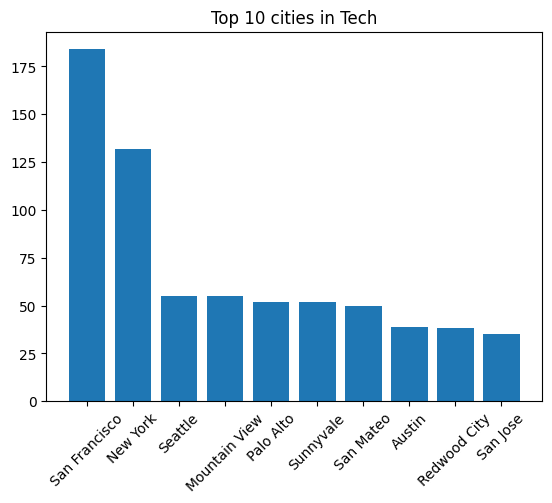

In [21]:
top_10_cities_usa = city_counts.head(10)

plt.bar(top_10_cities_usa["City"], top_10_cities_usa["Count"])
plt.xticks(rotation=45) 
plt.title("Top 10 cities in Tech")
plt.show()
# Shows the top 10 cities in USA (with more appearance in the dataset) in a bar plot. 

In [24]:
df_1['Zip Code'] = df_1['offices'].apply(lambda x: x[0]['zip_code'] if (x and len(x) > 0 and 'zip_code' in x[0]) else None)
df_1
# Adds new columns named "City" and "Country Code" at the end of the dataframe with the information related to each company. 

,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,founded_year,...,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo,City,Country Code,Zip Code
0,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,2005.0,...,"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN,Seattle,USA,98104
1,Geni,geni,http://www.crunchbase.com/company/geni,http://www.geni.com,http://blog.geni.com,http://blog.geni.com/index.rdf,geni,web,18.0,2006.0,...,[],[],[],NaN,NaN,None,None,West Hollywood,USA,90069
2,StumbleUpon,stumbleupon,http://www.crunchbase.com/company/stumbleupon,http://www.stumbleupon.com,http://www.stumbleupon.com/blog,,stumbleupon,web,NaN,2002.0,...,"[{'available_sizes': [[[150, 72], 'assets/imag...",[{'external_url': 'http://www.facebook.com/Stu...,[],NaN,NaN,None,None,San Francisco,USA,
3,Gizmoz,gizmoz,http://www.crunchbase.com/company/gizmoz,http://gizmoz.com,,,None,web,NaN,2003.0,...,[],[],[],NaN,NaN,None,None,Menlo Park,USA,None
4,Lala,lala,http://www.crunchbase.com/company/lala,http://www.lala.com,http://www.lala.com/#blog,http://www.lala.com/#blog,None,games_video,NaN,NaN,...,"[{'available_sizes': [[[150, 103], 'assets/ima...",[],[],NaN,NaN,None,None,Palo Alto,USA,94301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,Chestnut Medical,chestnut-medical,http://www.crunchbase.com/company/chestnut-med...,http://www.chestnutmedical.com,,,,biotech,NaN,NaN,...,"[{'available_sizes': [[[150, 98], 'assets/imag...",[],[],NaN,NaN,None,None,Menlo Park,USA,94025
2288,iGuiders,iguiders,http://www.crunchbase.com/company/iguiders,http://www.iguiders.com,,,iGuiders,web,5.0,2008.0,...,"[{'available_sizes': [[[150, 90], 'assets/imag...",[],[],NaN,NaN,None,None,Beachwood,USA,44122
2289,SolarPower Israel,solarpower-israel,http://www.crunchbase.com/company/solarpower-i...,http://www.solarpower.co.il,,,,cleantech,NaN,NaN,...,"[{'available_sizes': [[[150, 102], 'assets/ima...",[],[],NaN,NaN,None,None,,ISR,42815
2290,Purfresh,purfresh,http://www.crunchbase.com/company/purfresh,http://www.purfresh.com,http://info.purfresh.com/PurTalk,,Purfresh_Inc,cleantech,NaN,1996.0,...,"[{'available_sizes': [[[150, 91], 'assets/imag...",[],[],NaN,NaN,None,None,Menlo Park,USA,94025


In [37]:
zip_code_in_usa = df_1[(df_1["Country Code"] == "USA") & (df_1["Zip Code"] != "")]
zip_code_counts = zip_code_in_usa["Zip Code"].value_counts().reset_index()
zip_code_counts.columns = ["Zip code", "Count"]
zip_code_counts
# Counts the repetition of the zip codes in USA.

,Zip code,Count
0,94105,40
1,94107,39
2,94085,29
3,94043,28
4,95054,26
...,...,...
632,20815,1
633,55330,1
634,95630,1
635,94024,1


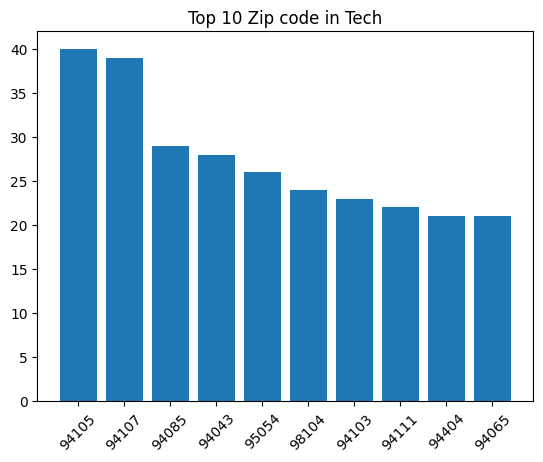

In [38]:
top_10_zip_code_usa = zip_code_counts.head(10)

plt.bar(top_10_zip_code_usa["Zip code"], top_10_zip_code_usa["Count"])
plt.xticks(rotation=45) 
plt.title("Top 10 Zip code in Tech")
plt.show()
# Shows the top 10 zip codes in USA (with more appearance in the dataset) in a bar plot. 